In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\carlo\AppData\Local\Temp\ipykernel_17232\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('fake_transactional_data_24.csv', encoding='utf-8')
df = df.rename(columns={"from_totally_fake_account": "AccountNumber", "monopoly_money_amount": "MoneyTransferAmount", "to_randomly_generated_account": "TransferredLocationAccount", "not_happened_yet_date": "TransactionDate"})
# from_totally_fake_account  = AccountNumber
# monopoly_money_amount = MoneyTransferAmount
# to_randomly_generated_account = TransferredLocationAccount
# not_happened_yet_date = TransactionDate

C:\Users\carlo\AppData\Local\Temp\ipykernel_21988\3498427713.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_df['MoneyTransferAmount'], color='skyblue', shade=True)


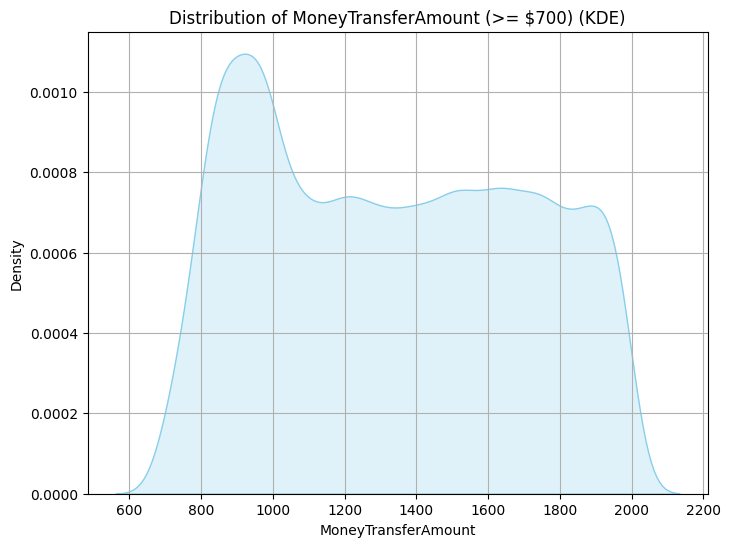

In [5]:
import seaborn as sns

# Filter the DataFrame to include only values greater than or equal to $700
filtered_df = df[df['MoneyTransferAmount'] >= 700]

# Create a KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(filtered_df['MoneyTransferAmount'], color='skyblue', shade=True)
plt.title('Distribution of MoneyTransferAmount (>= $700) (KDE)')
plt.xlabel('MoneyTransferAmount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called df

# Group by 'AccountNumber' and sum the 'MoneyTransferAmount' for each account
total_spent_per_account = df.groupby('AccountNumber')['MoneyTransferAmount'].sum()

# Sort the total spent values in descending order
sorted_total_spent = total_spent_per_account.sort_values(ascending=False)

# Select the top 100 AccountNumbers
top_100_accounts = sorted_total_spent.head(100)

# Display the top 100 AccountNumbers
print(top_100_accounts)

AccountNumber
17398.0    45141.37
18827.0    42762.53
72758.0    42305.12
64691.0    41986.90
3458.0     41919.88
             ...   
85767.0    37889.12
27801.0    37878.20
37988.0    37855.36
35691.0    37786.66
90681.0    37770.45
Name: MoneyTransferAmount, Length: 100, dtype: float64


C:\Users\carlo\AppData\Local\Temp\ipykernel_35756\969193525.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spendings = account_transactions.resample('M')['MoneyTransferAmount'].sum()


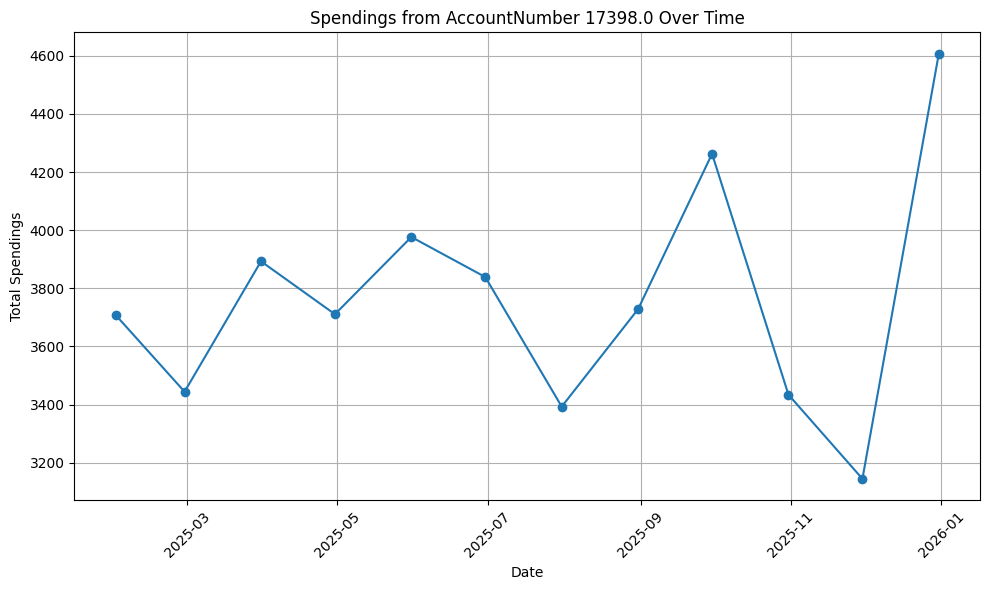

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df

# Ensure 'TransactionDate' is in datetime format with correct format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%Y')

# Set 'TransactionDate' as the index
df.set_index('TransactionDate', inplace=True)

# Filter transactions for AccountNumber 17398.0
account_transactions = df[df['AccountNumber'] == 17398.0]

# Resample transactions to monthly frequency and sum the spendings
monthly_spendings = account_transactions.resample('M')['MoneyTransferAmount'].sum()

# Plot the spendings over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_spendings.index, monthly_spendings.values, marker='o', linestyle='-')
plt.title('Spendings from AccountNumber 17398.0 Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spendings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Filter transactions for AccountNumber 17398.0
account_transactions = df[df['AccountNumber'] == 17398.0]

# Find the highest payment
highest_payment = account_transactions['MoneyTransferAmount'].max()

# Output the highest payment
print("Highest payment made by AccountNumber 17398.0:", highest_payment)


Highest payment made by AccountNumber 17398.0: 1895.0


In [17]:
# Filter transactions for AccountNumber 17398.0
account_transactions = df[df['AccountNumber'] == 17398.0]

# Group by TransactionDate and calculate the mean MoneyTransferAmount for each day
daily_average_payment = account_transactions.groupby('TransactionDate')['MoneyTransferAmount'].mean()

# Output the daily average payment
print("Daily average payment for AccountNumber 17398.0:")
print(daily_average_payment.mean())  # Overall daily average payment


Daily average payment for AccountNumber 17398.0:
16.333593986152827


In [4]:
# Assuming your dataset is loaded into a DataFrame called df

# Filter transactions for AccountNumber 17398.0
account_transactions = df[df['AccountNumber'] == 17398.0]

# Group by 'TransferredLocationAccount' and sum the 'MoneyTransferAmount' for each account
total_spent_per_account = account_transactions.groupby('TransferredLocationAccount')['MoneyTransferAmount'].sum()

# Find the TransferredLocationAccounts where more money was spent compared to others
top_transferred_accounts = total_spent_per_account[total_spent_per_account > total_spent_per_account.mean()]

# Output the top TransferredLocationAccounts
print("TransferredLocationAccounts where AccountNumber 17398.0 spent more money on:")
print(top_transferred_accounts)

TransferredLocationAccounts where AccountNumber 17398.0 spent more money on:
TransferredLocationAccount
23639                  18540.00
91055                   1459.50
A_SUPERMARKET           1731.46
BAR                     1745.00
CLOTHES_SHOP            1088.00
DEPARTMENT_STORE        1077.00
EXPRESS_SUPERMARKET     1206.61
FASHION_SHOP             968.00
LARGE_SUPERMARKET       1425.65
LOCAL_WATERING_HOLE     1774.50
PUB                     2294.75
THE_SUPERMARKET         1606.45
Name: MoneyTransferAmount, dtype: float64


In [7]:
# Filter transactions where TransferredLocationAccount is 23639
transactions_to_23639 = df[df['TransferredLocationAccount'] == '23639']

# Extract unique AccountNumbers associated with those transactions
unique_account_numbers = transactions_to_23639['AccountNumber'].unique()

# Output the unique AccountNumbers
print("Unique AccountNumbers that have made transactions to TransferredLocationAccount 23639:")
print(unique_account_numbers)


Unique AccountNumbers that have made transactions to TransferredLocationAccount 23639:
[43463. 82058. 19907. 75231. 97790. 19027. 17398. 35961. 80140. 56983.
 13375. 87175. 51590. 15350. 82862. 15483. 79779. 82931. 45745.]


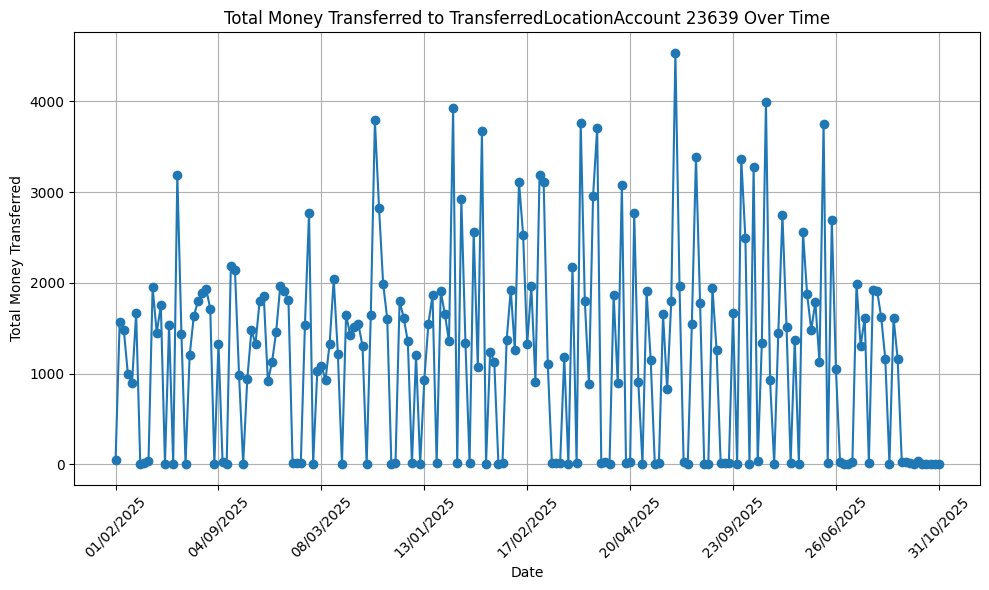

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter transactions where TransferredLocationAccount is 23639
transactions_to_23639 = df[df['TransferredLocationAccount'] == '23639']

# Group by TransactionDate and sum the MoneyTransferAmount
total_money_transferred = transactions_to_23639.groupby('TransactionDate')['MoneyTransferAmount'].sum()

# Plot the total amount of money transferred over time
plt.figure(figsize=(10, 6))
total_money_transferred.plot(marker='o', linestyle='-')
plt.title('Total Money Transferred to TransferredLocationAccount 23639 Over Time')
plt.xlabel('Date')
plt.ylabel('Total Money Transferred')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Find the top 100 AccountNumbers with the most total spent money
top_100_accounts = total_spent_per_account.nlargest(100)

# Filter the DataFrame to include transactions from these AccountNumbers
transactions_from_top_100 = df[df['AccountNumber'].isin(top_100_accounts.index)]

# Group by 'TransferredLocationAccount' and count occurrences
transferred_accounts_count = transactions_from_top_100['TransferredLocationAccount'].value_counts()

# Output the TransferredLocationAccounts in descending order of occurrences
print("TransferredLocationAccounts where all the money got transferred from the top 100 AccountNumbers:")
print(transferred_accounts_count)


TransferredLocationAccounts where all the money got transferred from the top 100 AccountNumbers:
TransferredLocationAccount
PUB                           11000
BAR                           10070
LOCAL_WATERING_HOLE            8403
A_LOCAL_COFFEE_SHOP            7756
TOTALLY_A_REAL_COFFEE_SHOP     7680
                              ...  
70932                             2
63177                             2
58517                             1
41960                             1
20189                             1
Name: count, Length: 1491, dtype: int64


In [14]:
# Filter the DataFrame to include only transactions with numeric TransferredLocationAccount
numeric_transactions = df[df['TransferredLocationAccount'].str.isdigit()]

# Group by numeric TransferredLocationAccount and sum the MoneyTransferAmount for each one
numeric_transferred_accounts = numeric_transactions.groupby('TransferredLocationAccount')['MoneyTransferAmount'].sum()

# Sort the totals in descending order and display the top 10
top_10_numeric_transferred_accounts = numeric_transferred_accounts.nlargest(10)

# Output the top 10 numeric TransferredLocationAccounts with most money transferred
print("Top 10 numeric TransferredLocationAccounts with most money transferred:")
print(top_10_numeric_transferred_accounts)


Top 10 numeric TransferredLocationAccounts with most money transferred:
TransferredLocationAccount
73476    516558.75
62396    511331.95
54417    500846.85
87073    493572.50
67945    483241.30
77901    479387.55
54211    478020.36
68986    476440.85
13309    472053.65
8181     449585.40
Name: MoneyTransferAmount, dtype: float64


In [41]:
# Filter transactions where TransferredLocationAccount is 73476
transactions_to_73476 = df[df['TransferredLocationAccount'] == '73476']

# Count the occurrences of each unique AccountNumber in those transactions
frequent_account_numbers = transactions_to_73476['AccountNumber'].value_counts()

# Select the top 10 most frequent AccountNumbers
top_10_frequent_account_numbers = frequent_account_numbers.nlargest(10)

# Output the top 10 most frequent AccountNumbers
print("Top 10 most frequent AccountNumbers making transactions to TransferredLocationAccount 73476:")
print(top_10_frequent_account_numbers)


Top 10 most frequent AccountNumbers making transactions to TransferredLocationAccount 73476:
AccountNumber
96653.0    32
90409.0    23
52924.0    20
25652.0    16
23314.0    16
21066.0    13
77557.0    12
81220.0    12
65063.0    12
67370.0    12
Name: count, dtype: int64


In [16]:
# Filter transactions where TransferredLocationAccount is 73476
transactions_to_73476 = df[df['TransferredLocationAccount'] == '73476']

# Extract unique AccountNumbers associated with those transactions
unique_account_numbers = transactions_to_73476['AccountNumber'].unique()

# Output the unique AccountNumbers
print("Unique AccountNumbers that made transactions to TransferredLocationAccount 73476:")
print(unique_account_numbers)


Unique AccountNumbers that made transactions to TransferredLocationAccount 73476:
[77557. 81897. 27124. 91655. 56352. 34539. 30075. 74312. 92696. 19907.
 77993. 96653. 59001. 91305. 40576. 30489. 28287. 96517. 52924. 23613.
  3417. 17089. 65063. 67370. 32029. 38026. 67809. 21066. 81220. 95149.
 14955. 33942. 90482. 58078.  4558. 23314. 25652. 90409. 17769.]


In [47]:
# Filter transactions for AccountNumber 77557
account_transactions = df[df['AccountNumber'] == 77557]

# Calculate the total amount spent by AccountNumber 77557
total_spent = account_transactions['MoneyTransferAmount'].sum()

# Output the total amount spent
print("Total amount spent by AccountNumber 77557:", total_spent)


Total amount spent by AccountNumber 77557: 27272.06


In [48]:
# Filter transactions for AccountNumber 77557
account_transactions = df[df['AccountNumber'] == 77557]

# Calculate the average payment made by AccountNumber 77557
average_payment = account_transactions['MoneyTransferAmount'].mean()

# Output the average payment
print("Average payment made by AccountNumber 77557:", average_payment)


Average payment made by AccountNumber 77557: 24.680597285067876


In [49]:
# Filter transactions for AccountNumber 77557
account_transactions = df[df['AccountNumber'] == 77557]

# Find the row with the highest MoneyTransferAmount
highest_payment_row = account_transactions.loc[account_transactions['MoneyTransferAmount'].idxmax()]

# Extract the highest payment and the corresponding TransferredLocationAccount
highest_payment = highest_payment_row['MoneyTransferAmount']
transferred_location_account = highest_payment_row['TransferredLocationAccount']

# Output the highest payment and the TransferredLocationAccount
print("Highest payment made by AccountNumber 77557:", highest_payment)
print("TransferredLocationAccount paid to:", transferred_location_account)


Highest payment made by AccountNumber 77557: TransactionDate
2025-08-24    1850.00
2025-08-24      10.00
2025-08-24       5.50
2025-08-24      10.00
2025-08-24       5.50
2025-08-24      10.00
2025-08-24       5.50
2025-08-24       5.00
2025-08-24      26.33
2025-08-24       5.00
Name: MoneyTransferAmount, dtype: float64
TransferredLocationAccount paid to: TransactionDate
2025-08-24             73476
2025-08-24               BAR
2025-08-24              2249
2025-08-24               BAR
2025-08-24              2249
2025-08-24               BAR
2025-08-24              2249
2025-08-24     SANDWICH_SHOP
2025-08-24    TAKEAWAY_CURRY
2025-08-24             81897
Name: TransferredLocationAccount, dtype: object


In [42]:
# Filter transactions where TransferredLocationAccount is 73476
transactions_to_73476 = df[df['TransferredLocationAccount'] == '73476']

# Calculate the average payment made to TransferredLocationAccount 73476
average_payment_to_73476 = transactions_to_73476['MoneyTransferAmount'].mean()

# Output the average payment
print("Average payment made to TransferredLocationAccount 73476:", average_payment_to_73476)


Average payment made to TransferredLocationAccount 73476: 1018.853550295858


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='TransactionDate'>

Text(0.5, 1.0, 'Weekly Money Transferred to TransferredLocationAccount 73476')

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Total Money Transferred')

(array([2871, 2875, 2879, 2884, 2888, 2892, 2897, 2901, 2906, 2910, 2914,
        2919, 2922], dtype=int64),
 [Text(2871, 0, 'Jan\n2025'),
  Text(2875, 0, 'Feb'),
  Text(2879, 0, 'Mar'),
  Text(2884, 0, 'Apr'),
  Text(2888, 0, 'May'),
  Text(2892, 0, 'Jun'),
  Text(2897, 0, 'Jul'),
  Text(2901, 0, 'Aug'),
  Text(2906, 0, 'Sep'),
  Text(2910, 0, 'Oct'),
  Text(2914, 0, 'Nov'),
  Text(2919, 0, 'Dec'),
  Text(2922, 0, '')])

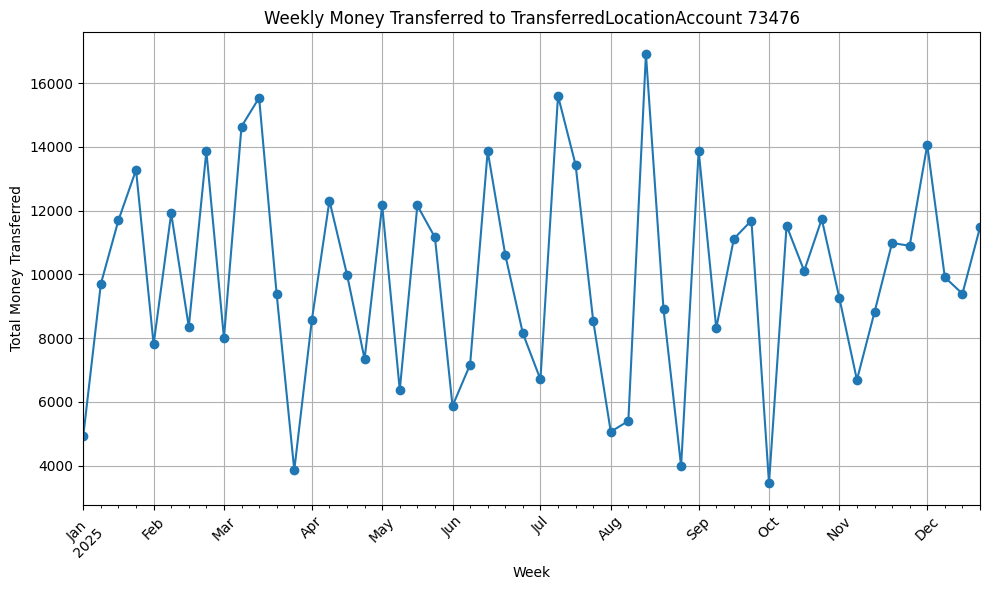

In [46]:
import matplotlib.pyplot as plt

# Convert 'TransactionDate' to datetime format with the correct format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%Y')

# Set 'TransactionDate' as the index
df.set_index('TransactionDate', inplace=True)

# Filter transactions where TransferredLocationAccount is 73476
transactions_to_73476 = df[df['TransferredLocationAccount'] == '73476']

# Resample the data to weekly frequency and sum the MoneyTransferAmount for each week
weekly_money_transferred = transactions_to_73476['MoneyTransferAmount'].resample('W').sum()

# Plot the amount of weekly money transferred
plt.figure(figsize=(10, 6))
weekly_money_transferred.plot(marker='o', linestyle='-')
plt.title('Weekly Money Transferred to TransferredLocationAccount 73476')
plt.xlabel('Week')
plt.ylabel('Total Money Transferred')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Filter transactions with MoneyTransferAmount of 1995.0
transactions_of_amount = df[df['MoneyTransferAmount'] == 1995.0]

# Count the unique AccountNumbers associated with transactions of that amount
num_account_numbers = transactions_of_amount['AccountNumber'].nunique()

# Output the number of AccountNumbers
print("Number of AccountNumbers that made a transaction of 1995.0:", num_account_numbers)


Number of AccountNumbers that made a transaction of 1995.0: 96


In [21]:
# Filter transactions with MoneyTransferAmount of 1995.0
transactions_of_amount = df[df['MoneyTransferAmount'] == 1995.0]

# Group by AccountNumber and count the number of transactions for each AccountNumber
transactions_per_account = transactions_of_amount.groupby('AccountNumber').size()

# Count the number of AccountNumbers with more than 1 transaction
num_accounts_more_than_1_transaction = (transactions_per_account > 1).sum()

# Output the number of AccountNumbers with more than 1 transaction of 1995.0
print("Number of AccountNumbers that made more than 1 transaction of 1995.0:", num_accounts_more_than_1_transaction)


Number of AccountNumbers that made more than 1 transaction of 1995.0: 1


In [22]:
# Filter transactions with MoneyTransferAmount of 1995.0
transactions_of_amount = df[df['MoneyTransferAmount'] == 1995.0]

# Group by AccountNumber and count the number of transactions for each AccountNumber
transactions_per_account = transactions_of_amount.groupby('AccountNumber').size()

# Filter AccountNumbers with more than 1 transaction
account_numbers_more_than_1_transaction = transactions_per_account[transactions_per_account > 1]

# Output the AccountNumbers with more than 1 transaction of 1995.0
print("AccountNumbers that made more than 1 transaction of 1995.0:")
print(account_numbers_more_than_1_transaction)


AccountNumbers that made more than 1 transaction of 1995.0:
AccountNumber
53444.0    2
dtype: int64
